#  Hidden messages!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

## 1 - Create a sound file with numpy

The exercise is to create a beautiful c-major chord with tre different tones.


### Theory of C-Major chord

C Major is a combination of 3 notes: C, E and G.

These tones have different frequencies. Here are the frequencies for the sine waves for the 3 notes:

* C, 523.2511306011972 Hz
* E, 659.2551138257398 Hz
* G, 783.9908719634986 Hz

The frequencies are taken from : (https://www.szynalski.com/tone-generator/)[https://www.szynalski.com/tone-generator/]

Lets use f(t) = A * sin(pi * 2 * f * t) to calculate our sine waves

In [2]:
# Calculate time for sine wave
t = np.linspace(0,0.5, num=16000)
t

array([0.00000000e+00, 3.12519532e-05, 6.25039065e-05, ...,
       4.99937496e-01, 4.99968748e-01, 5.00000000e-01])

In [3]:
# Calculate the different sine waves based on different note frequencies
c = np.sin(np.pi * 2 * 523.2511306011972 * t)
e = np.sin(np.pi * 2 * 659.2551138257398 * t)
g = np.sin(np.pi * 2 * 783.9908719634986 * t)

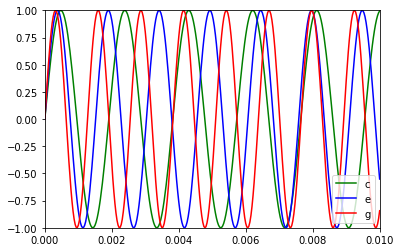

In [4]:
# Show all the sine waves
plt.plot(t,c,"-g", label="c")
plt.plot(t,e,"-b", label="e")
plt.plot(t,g,"-r", label="g")
plt.legend(loc="lower right")
plt.ylim(-1,1)
plt.xlim(0,0.01)
plt.show()

### Scale down the audio to stop clipping from the audio

In [5]:
c_major = np.add(c, e)  
c_major = np.add(c_major, g)
c_major = c_major * 1/3 # Normalize audio to be between -1 <-> 1

### A look at the sine wave

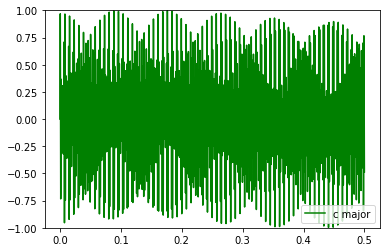

In [6]:
plt.plot(t,c_major,"-g", label="c major")
plt.legend(loc="lower right")
plt.ylim(-1,1)
plt.show()

### A closer look at the sine wave

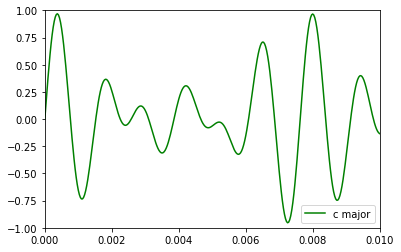

In [7]:
plt.plot(t,c_major,"-g", label="c major")
plt.legend(loc="lower right")
plt.ylim(-1,1)
plt.xlim(0,0.01)
plt.show()

### Creating a method for prepending the needed lines for .dat files

This method opens the file and prepends the 2 lines of text and saves the file.

In [8]:
def addSettingsToFile(file_Name):
    # Read data and add two lines to the beginning
    src=open(file_Name,"r")
    settings="; SampleRate 16000\n; Channels 1\n"
    data=src.readlines()
    data.insert(0, settings)
    src.close()

    # Save the data as the same 
    src=open(file_Name,"w")
    src.writelines(data)
    src.close()

### Save all the different sounds ( tones/ chords/ sinewaves)

In [9]:
np.savetxt('c.dat', np.c_[t,c])
addSettingsToFile('c.dat')

In [10]:
np.savetxt('e.dat', np.c_[t,e])
addSettingsToFile('e.dat',)

In [11]:
np.savetxt('g.dat', np.c_[t,g])
addSettingsToFile('g.dat')

In [12]:
np.savetxt('cMajor.dat', np.c_[t,c_major])
addSettingsToFile('cMajor.dat')

We can use Sox to convert the .dat files to hear our beautiful sounds.

##  2 RGB IMAGE

The exercise is to split the image to different luminance channels and combine them as a new image

In [13]:
image = img.imread('Ivysaur.jpg')

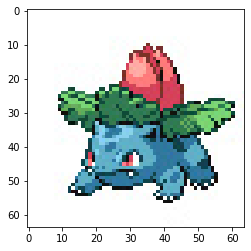

In [14]:
plt.imshow(image)
plt.show() # removes header and shows image

inspect the dtype and shape to get a better picture of the image

In [15]:
print("data type: ", image.dtype)
print("iamge size: ", image.shape)

data type:  uint8
iamge size:  (64, 64, 3)


### Split the image to luminance channels


### Red luminance channel

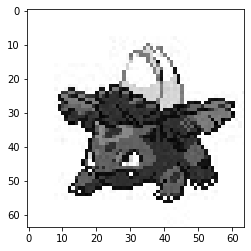

In [16]:
red_luminance = image[:,:,0] #alpha chanel where 0 is black and  255 is white  RED
plt.imshow(red_luminance,  cmap='gray') 

### Green luminance channel

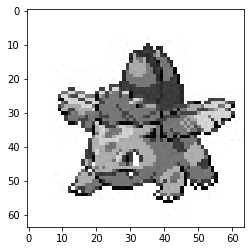

In [17]:
green_luminance = image[:,:,1] #alpha chanel where 0 is black and  255 is white  GREEN
plt.imshow(green_luminance,  cmap='gray') 

### Blue luminance channel

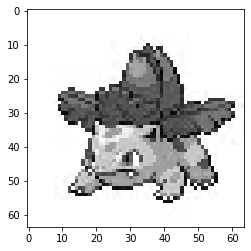

In [18]:
blue_luminance = image[:,:,2] #alpha chanel where 0 is black and  255 is white  BLUE
plt.imshow(blue_luminance,  cmap='gray') 

### Comparison

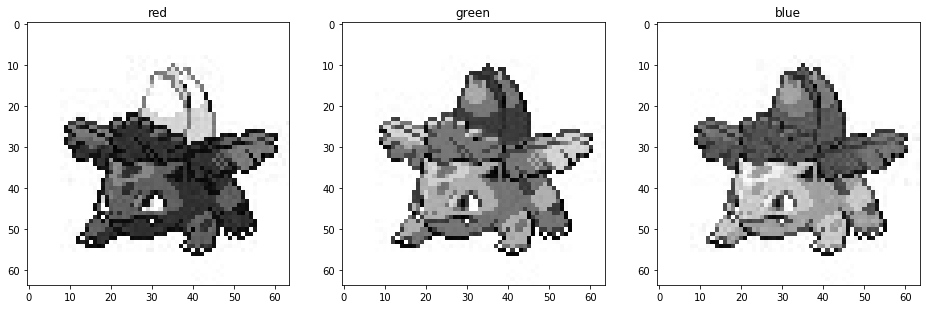

In [19]:
fig = plt.figure(figsize=(16,16))
a = fig.add_subplot(1,3,1)
a.set_title("red")
plt.imshow(red_luminance, cmap='gray') 
b = fig.add_subplot(1,3,2) # place img in middle
b.set_title("green")
plt.imshow(green_luminance, cmap='gray') 
c = fig.add_subplot(1,3,3) # places image to far right
c.set_title("blue")
plt.imshow(blue_luminance, cmap='gray') 
plt.show()

### Comparison with colors

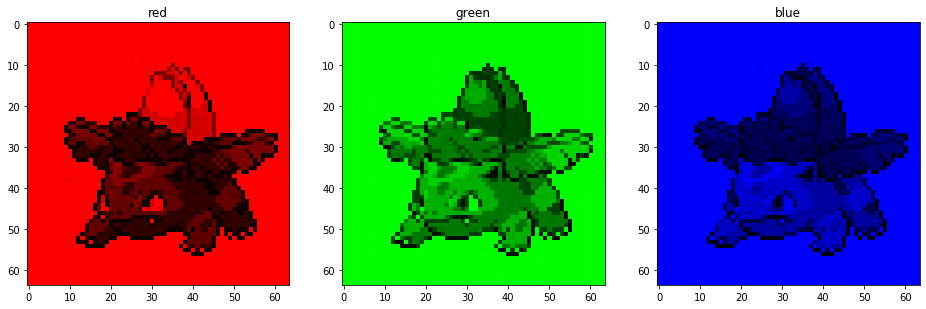

In [20]:
# Create images containing only its own color
empty = np.full((64,64), 0)
red_img = np.dstack((red_luminance, empty, empty))
green_img = np.dstack((empty, green_luminance, empty))
blue_img = np.dstack((empty, empty, blue_luminance))

fig = plt.figure(figsize=(16,16))
a = fig.add_subplot(1,3,1)
a.set_title("red")
plt.imshow(red_img) 
b = fig.add_subplot(1,3,2) # place img in middle
b.set_title("green")
plt.imshow(green_img) 
c = fig.add_subplot(1,3,3) # places image to far right
c.set_title("blue")
plt.imshow(blue_img) 
plt.show()

### Combinations of two colors

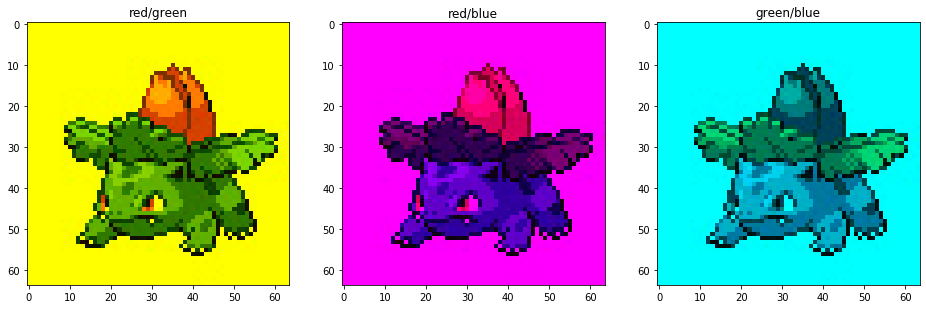

In [21]:
# Create images containing 2 of the colors
empty = np.full((64,64), 0)
red_green_img = np.dstack((red_luminance, green_luminance, empty))
red_blue_img = np.dstack((red_luminance, empty, blue_luminance))
green_blue_img = np.dstack((empty, green_luminance, blue_luminance))

fig = plt.figure(figsize=(16,16))
a = fig.add_subplot(1,3,1)
a.set_title("red/green")
plt.imshow(red_green_img) 
b = fig.add_subplot(1,3,2) # place img in middle
b.set_title("red/blue")
plt.imshow(red_blue_img) 
c = fig.add_subplot(1,3,3) # places image to far right
c.set_title("green/blue")
plt.imshow(green_blue_img) 
plt.show()

### Combination of all colors

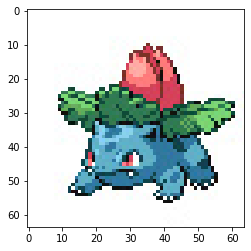

In [22]:
new_img = np.dstack((red_luminance, green_luminance, blue_luminance))
plt.imshow(new_img)
plt.show() # removes header

## 3 Hide info in picture

The exercise is to hide an hidden message in the images alpha channel

### Load in image of fabio

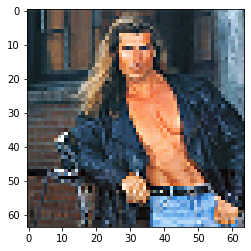

In [23]:
fabio = img.imread('fabio64.png')
plt.imshow(fabio)
plt.show() # remove header

### Lets take a look at fabios alpha channel

In [24]:
fabio_alpha = fabio[:,:,3]

In [25]:
fabio_alpha

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

We can observe that it has its alpha channel maxed.

### Create a hidden message

I created a image with photoshop with 2 different colors of white.

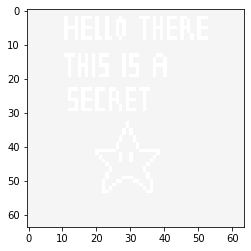

In [26]:
secret = img.imread('message.png')
plt.imshow(secret)
plt.show() # remove header

### Show image better

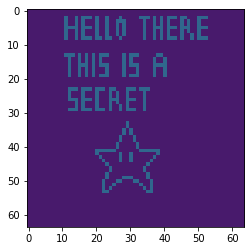

In [27]:
plt.imshow(secret[:,:,2], clim=(0.95,1.1)) 
plt.show()

### Save image values as a variable for the new alpha channel

In [28]:
alpha = secret[:,:,2]

### Save new alpha channel to fabio

In [29]:
hidden_fabio = fabio
hidden_fabio[:,:,3] = alpha

### Show new image

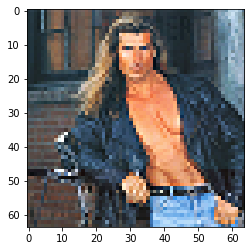

In [30]:
plt.imshow(hidden_fabio)
plt.show() # remove header

### Show hidden image

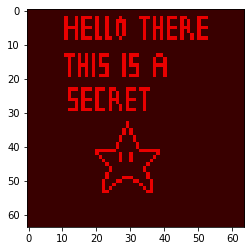

In [31]:
plt.imshow(hidden_fabio[:,:,3], clim=(0.95,1.1), cmap="hot") 
plt.show()

###  Compare the original image and the one with the hidden message

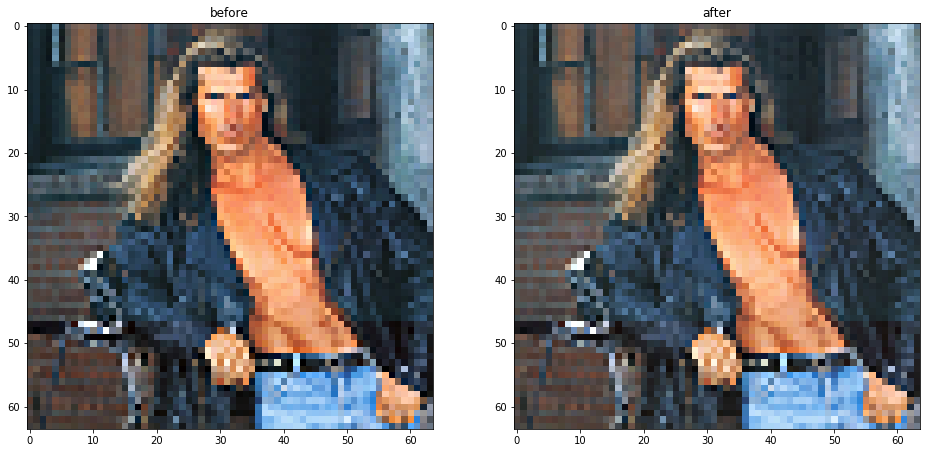

In [32]:
fig = plt.figure(figsize=(16,16))
a = fig.add_subplot(1,2,1)
a.set_title("before")
og_fabio = img.imread('fabio64.png')
plt.imshow(og_fabio) 
b = fig.add_subplot(1,2,2)
b.set_title("after")
plt.imshow(fabio) 
plt.show()

### Comparison of the new image and the hidden message in the picture

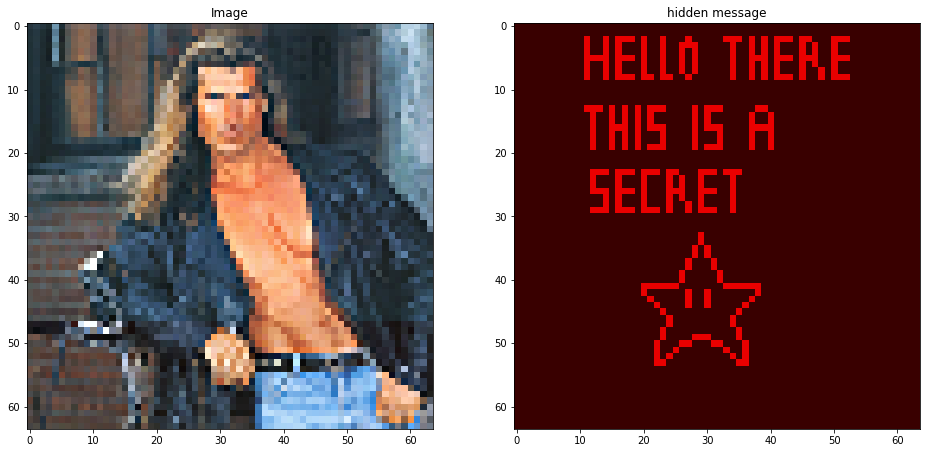

In [33]:
fig = plt.figure(figsize=(16,16))
a = fig.add_subplot(1,2,1)
a.set_title("Image")
plt.imshow(hidden_fabio) 
b = fig.add_subplot(1,2,2)
b.set_title("hidden message")
plt.imshow(hidden_fabio[:,:,3], clim=(0.95,1.1), cmap="hot") 
plt.show()

### Show the hidden image in a histogram

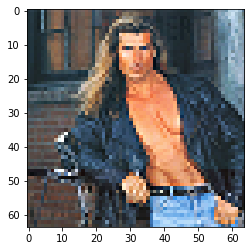

In [34]:
plt.imshow(hidden_fabio)
plt.show()

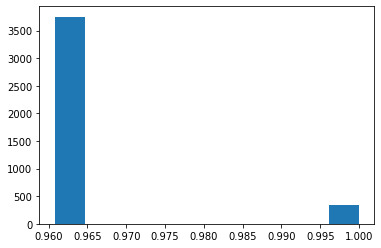

In [35]:
plt.hist(hidden_fabio[:,:,3].ravel(),bins= 10) # red chanel hist
plt.show()